# How to infer gyrochronal age precision using vertical actions

I want to infer the precision on gyrochronal age as a function of vertical action. I need to marginalise over the radial velocities as I don't have these for the majority of the stars.

Here is a model of the vertical action dispersion as a function of time:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
import emcee

Line break at sigma Jz = 1.63969070499 ln age =  2.28793464321
m1 = 0.756683225885 c1 = 0.112322983043


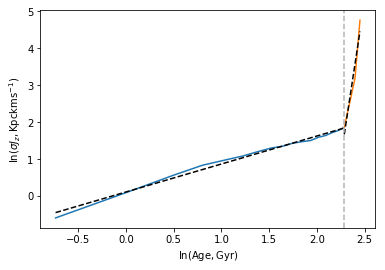

In [2]:
dw = pd.read_csv("data/dwarf.txt")

c = -3
a1, j1 = dw.age.values[:c], dw.jz.values[:c]
a2, j2 = dw.age.values[c-1:], dw.jz.values[c-1:]

x1, y1 = np.log(a1), np.log(j1)
x2, y2 = np.log(a2), np.log(j2)
xlabel, ylabel = "$\ln (\mathrm{Age, Gyr})$", "$\ln(\sigma J_z, \mathrm{Kpc kms}^{-1})$"

pl.plot(x1, y1)
pl.plot(x2, y2)
pl.xlabel(xlabel)
pl.ylabel(ylabel)

def fit_line(x, y, yerr):
    AT = np.vstack((x, np.ones(len(x))))
    ATA = np.dot(AT, AT.T)
    return np.linalg.solve(ATA, np.dot(AT, y))
    
m1, c1 = fit_line(x1, y1, np.ones_like(x1)*.1)
pl.plot(x1, m1*x1 + c1, "k", ls="--")
m2, c2 = fit_line(x2, y2, np.ones_like(x2)*.1)
pl.plot(x2, m2*x2 + c2, "k", ls="--")
pl.axvline(x2[c-1], color=".7", ls="--")

print("Line break at sigma Jz =", y1[c-1], "ln age = ", x2[c-1])
print("m1 =", m1, "c1 =", c1) 

Now, infer age as function of observed vertical action dispersion.

In [3]:
data = pd.read_csv("data/ages_and_actions_mod.csv")
data

,Unnamed: 0,Jz,kepid,age,feh,logg,period,teff
0,0,2.907606,10087717.0,1.658648,0.070788,4.457805,11.063101,6141.522744
1,1,0.644833,10017419.0,0.458568,0.210157,4.447337,6.408034,6077.693054
2,2,0.463440,10122937.0,0.721801,-0.260423,4.375453,6.323416,6105.900399
3,3,41.835798,10018146.0,7.325317,-0.041424,4.311363,19.086120,6245.046816
4,4,1.390003,10079226.0,3.838139,-0.200000,4.371991,15.698725,6078.000000
5,5,28.491402,10034643.0,0.193829,-0.279453,4.440683,2.828089,6151.073188
6,6,0.622623,10083309.0,4.418107,-0.200480,4.203763,16.290742,6101.919399
7,7,0.456686,10079481.0,7.196943,-0.239677,4.342714,19.906116,6161.396491
8,8,3.505149,10065923.0,8.133533,-0.359957,4.350299,17.886067,6177.509633
9,9,11.217976,10025841.0,1.137129,-0.200000,4.099039,11.862112,5738.000000


/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


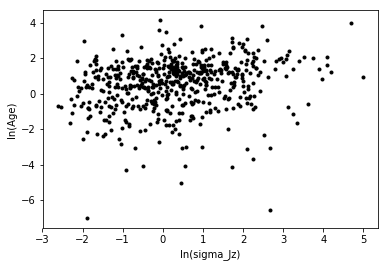

In [4]:
pl.plot(np.log(data.Jz), np.log(data.age), "k.")
pl.xlabel("ln(sigma_Jz)")
pl.ylabel("ln(Age)")

$$ \ln(\mathrm{A}) =  m\ln(\sigma_{Jz}^2) + c$$

$$ p(A|\sigma_A, Jz, \beta) = \ln\mathcal{L} = -\frac{1}{2}\sum_{i=1}^{N} \frac{(A_i - [m\sigma_{Jz}^2 + c])^2}{\sigma_A^2} - \frac{1}{2} \ln(2\pi \sigma_A) $$


$$ J_z^2 \sim \mathcal{N} \left(0, [\beta A + \sigma_{Jz}^2 ]\right) $$

$$ p(A, J_z, \sigma_{Jz}, \beta) = \ln\mathcal{L} = -\frac{1}{2}\sum_{i=1}^{N} \frac{J_{z,i}^2}{\beta A + \sigma_{Jz}^2} - \frac{1}{2} \ln(2\pi [\beta A + \sigma_{Jz}^2]) $$

Here is a likelihood function (also the log-prob):

In [5]:
def lnprob(beta, *args):
    """
    Given a vertical action, calculate an age.
    Vertical action dispersion increases with time.
    Vertical action is drawn from a Normal distribution with zero mean and
    dispersion that is a function of time.
    """
    ages, Jz, Jz_err = args
    if beta > 0:
        lnlike = np.sum(-.5*(Jz**2/(beta*ages + Jz_err**2)) - .5*np.log(2*np.pi*(beta*ages + Jz_err**2)))
        if np.isfinite(lnlike):
            return lnlike
        else:
            return -np.inf
    else:
        return -np.inf

In [6]:
beta_init = 100

args = [data.age.values, data.Jz.values, data.Jz.values*.1 + .1]
nwalkers, ndim, nsteps, bi = 64, 1, 2000, 1000
p0 = [beta_init + np.random.randn(1)*1e-4 for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=args)
sampler.run_mcmc(p0, nsteps);
flat = np.reshape(sampler.chain[:, bi:, :], (nwalkers*(nsteps - bi), ndim))

22.6959705198


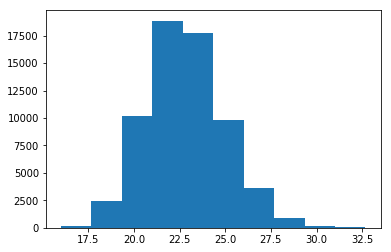

In [7]:
pl.hist(flat[:, 0])
print(np.median(flat[:, 0]))

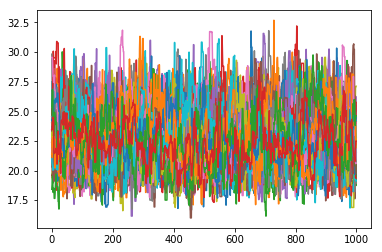

In [8]:
for i in range(nwalkers):
    pl.plot(sampler.chain[i, bi:, 0])

So $$ J_z^2 \sim \mathcal{N}\left( 0, 22.66A + \sigma_{Jz}^2 \right) $$

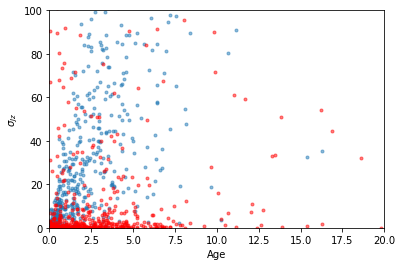

In [9]:
pl.plot(data.age, abs(np.random.randn(len(data.age))*(22.66*data.age + data.Jz.values*.1 + .1)), ".", alpha=.5)
pl.plot(data.age, data.Jz**2, "r.", alpha=.5)
pl.ylim(0, 100)
pl.xlim(0, 20)
pl.ylabel("$\sigma_{Jz}$")
pl.xlabel("Age")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


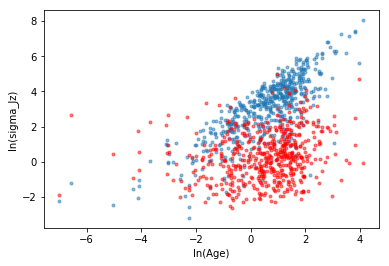

In [10]:
pl.plot(np.log(data.age), np.log(abs(np.random.randn(len(data.age))*(22.66*data.age + data.Jz.values*.1 + .1))),
        ".", alpha=.5)
pl.plot(np.log(data.age), np.log(data.Jz), "r.", alpha=.5)
pl.ylabel("ln(sigma_Jz)")
pl.xlabel("ln(Age)")

(0, 20)

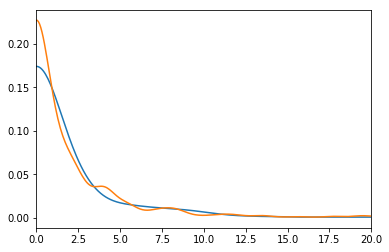

In [11]:
import scipy.stats as sps

xs = np.linspace(-40, 40, 2*len(data.Jz))

d2 = np.abs(np.random.randn(len(data.age))*(1*data.age+data.Jz.values*.1+.1))
d3 = np.abs(np.random.randn(len(data.age))*2)

N = len(data.Jz)
data1, data2, data3 = np.zeros(2*N), np.zeros(2*N), np.zeros(2*N)
data1[N:], data1[:N] = data.Jz, -data.Jz[::-1]
data2[N:], data2[:N] = d2, -d2[::-1]
data3[N:], data3[:N] = d3, -d3[::-1]

kernel1 = sps.gaussian_kde(data1, bw_method=.1)
kde1 = kernel1(xs)
kernel2 = sps.gaussian_kde(data2, bw_method=.1)
kde2 = kernel2(xs)
kernel3 = sps.gaussian_kde(data3, bw_method=.1)
kde3 = kernel3(xs)

#pl.hist(data1, 200, normed=True);
#pl.hist(data2, 200, normed=True, alpha=.7);
#pl.hist(data3, 20, normed=True, alpha=.5, edgecolor="k", histtype="stepfilled");
gauss = lambda xs, A, mu, sigma: A**2*np.exp(-.5*(xs - mu)**2/sigma**2)
#pl.plot(xs, gauss(xs, .428, 0, 2), ls="--")
#pl.plot(xs, gauss(xs, .428, 0, 1*np.mean(data.age)+np.mean(data.Jz.values)*.1+.1), ls="--")
pl.plot(xs, kde1, label="Data")
pl.plot(xs, kde2, label="Model")

pl.xlim(0, 20)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


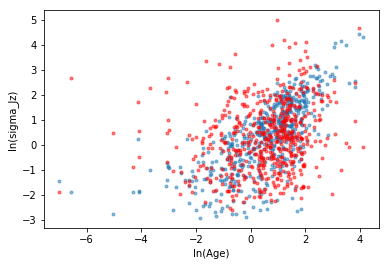

In [12]:
pl.plot(np.log(data.age), np.log(.05+abs(np.random.randn(len(data.age))*(1*data.age+data.Jz.values*.1+.1))),
        ".", alpha=.5)
pl.plot(np.log(data.age), np.log(data.Jz), "r.", alpha=.5)
pl.ylabel("ln(sigma_Jz)")
pl.xlabel("ln(Age)")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


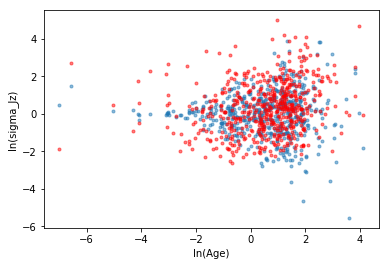

In [32]:
pl.plot(np.log(data.age), np.random.randn(len(data.age))*(1+np.log(data.age)*.3),
        ".", alpha=.5)
pl.plot(np.log(data.age), np.log(data.Jz), "r.", alpha=.5)
pl.ylabel("ln(sigma_Jz)")
pl.xlabel("ln(Age)")

In [139]:
def lnprob(par, *args):
    """
    Given a vertical action, calculate an age.
    Vertical action dispersion increases with time.
    Vertical action is drawn from a Normal distribution with zero mean and
    dispersion that is a function of time.
    """
    beta, alpha = par
    ages, Jz, Jz_err = args
    if beta > 0 and 0 < alpha < 100:
        lnlike = np.sum(-.5*(Jz**2/(beta*ages+alpha + Jz_err**2))
                        - .5*np.log(2*np.pi*(beta*ages+alpha + Jz_err**2)))
        if np.isfinite(lnlike):
            return lnlike
        else:
            return -np.inf
    else:
        return -np.inf

In [187]:
par_init = [.3, 1]

m = data.age.values > 0
args = [data.age.values[m], data.Jz.values[m], data.Jz.values[m]*.35 + .1]
nwalkers, ndim, nsteps, bi = 64, len(par_init), 5000, 1000
p0 = [par_init + np.random.randn(1)*1e-4 for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=args)
sampler.run_mcmc(p0, nsteps);
flat = np.reshape(sampler.chain[:, bi:, :], (nwalkers*(nsteps - bi), ndim))

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


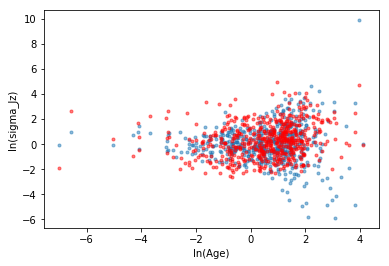

In [188]:
beta, alpha = np.median(flat, axis=0)
pl.plot(np.log(data.age), np.random.randn(len(data.age))*((alpha+data.age*beta)**.5),
        ".", alpha=.5)
pl.plot(np.log(data.age), np.log(data.Jz), "r.", alpha=.5)
pl.ylabel("ln(sigma_Jz)")
pl.xlabel("ln(Age)")

(0, 20)

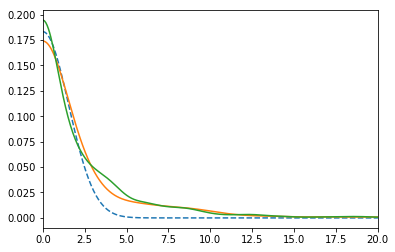

In [200]:
xs = np.linspace(-40, 40, 2*len(data.Jz))
gauss = lambda xs, A, mu, sigma: A**2*np.exp(-.5*(xs - mu)**2/sigma**2)
pl.plot(xs, gauss(xs, .428, 0, (alpha+np.mean(data.age)*beta)**.5), ls="--")
pl.plot(xs, kde1, label="Data")
pl.plot(xs, kde2, label="Model")

pl.xlim(0, 20)

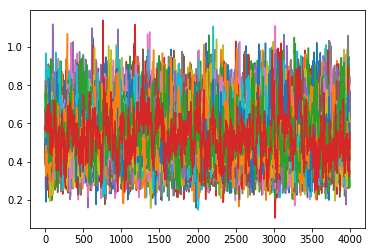

In [191]:
for i in range(nwalkers):
    pl.plot(sampler.chain[i, bi:, 0])

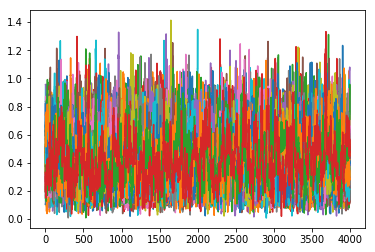

In [192]:
for i in range(nwalkers):
    pl.plot(sampler.chain[i, bi:, 1])

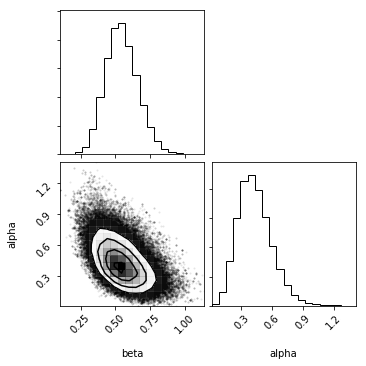

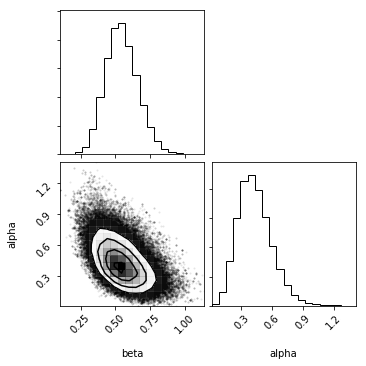

In [193]:
import corner
corner.corner(flat, labels=["beta", "alpha"])

Test the LHF on some fake data.

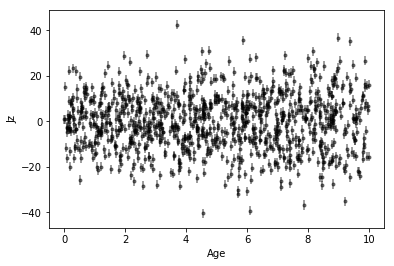

In [233]:
true_a, true_b = 100, 10
x = np.random.uniform(0, 10, 1000)
err = 2
y = np.random.randn(len(x))*((true_a+x*true_b)**.5) + np.random.randn(len(x))*.5
yerr = np.ones_like(y)*err
pl.errorbar(x, y, yerr=yerr, fmt="k.", alpha=.5)
pl.ylabel("Jz")
pl.xlabel("Age")

In [238]:
def lnprob(par, *args):
    """
    Given a vertical action, calculate an age.
    Vertical action dispersion increases with time.
    Vertical action is drawn from a Normal distribution with zero mean and
    dispersion that is a function of time.
    """
    beta, alpha = par
    x, y, yerr = args
    if beta > 0 and 0 < alpha < 1000:
        lnlike = np.sum(-.5*(y**2/(beta*x+alpha + yerr**2))
                        - .5*np.log(2*np.pi*(beta*x+alpha + yerr**2)))
        if np.isfinite(lnlike):
            return lnlike
        else:
            return -np.inf
    else:
        return -np.inf

In [239]:
par_init = [.3, 5]


args = [x, y, yerr]
nwalkers, ndim, nsteps, bi = 64, len(par_init), 5000, 1000
p0 = [par_init + np.random.randn(1)*1e-4 for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=args)
sampler.run_mcmc(p0, nsteps);
flat = np.reshape(sampler.chain[:, bi:, :], (nwalkers*(nsteps - bi), ndim))

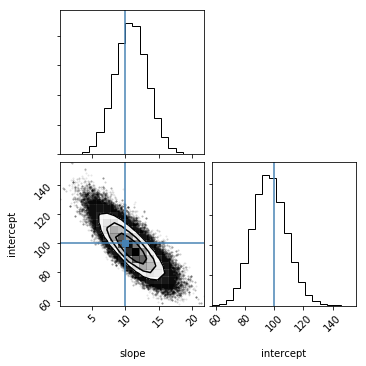

In [242]:
corner.corner(flat, labels=["slope", "intercept"], truths=[true_b, true_a]);

b =  10 10.8716932732 a =  100 96.6278113425


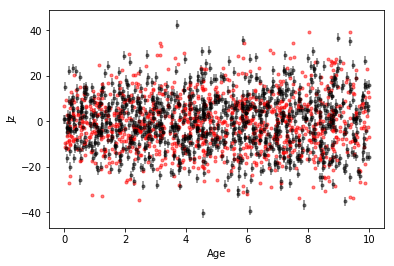

In [243]:
b, a = np.median(flat, axis=0)
print("b = ", true_b, b, "a = ", true_a, a)
pl.errorbar(x, y, yerr=yerr, fmt="k.", alpha=.5)
pl.plot(x, np.random.randn(len(x))*((b*x+a)**.5), "r.", alpha=.5)
pl.ylabel("Jz")
pl.xlabel("Age")

Now you need to figure out what the action uncertainties are --- try to nicely package the code in some neat way.